In [7]:
from google_play_scraper import app, Sort, reviews_all
from app_store_scraper import AppStore
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json, os, uuid

In [8]:
g_reviews = reviews_all(
        "in.zupay.app",
        sleep_milliseconds=0,
        lang='en',
        country='in',
        sort=Sort.NEWEST,
    )
a_reviews = AppStore('in', 'zuai-1-self-study-app', '1609941536')
a_reviews.review()

2024-04-30 16:03:58,518 [INFO] Base - Initialised: AppStore('in', 'zuai-1-self-study-app', 1609941536)


2024-04-30 16:03:58,518 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/in/app/zuai-1-self-study-app/id1609941536


2024-04-30 16:03:58,628 [INFO] Base - [id:1609941536] Fetched 6 reviews (6 fetched in total)


In [9]:
g_df = pd.DataFrame(np.array(g_reviews),columns=['review'])
g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))

g_df2.drop(columns={'userImage', 'reviewCreatedVersion'},inplace = True)
g_df2.rename(columns= {'score': 'rating','userName': 'user_name', 'reviewId': 'review_id', 'content': 'review_description', 'at': 'review_date', 'replyContent': 'developer_response', 'repliedAt': 'developer_response_date', 'thumbsUpCount': 'thumbs_up'},inplace = True)
g_df2.insert(loc=0, column='source', value='Google Play')
g_df2.insert(loc=3, column='review_title', value=None)
g_df2['laguage_code'] = 'en'
g_df2['country_code'] = 'in'
g_df2

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,Google Play,c774de5e-b81a-44f9-a1b8-1b914ac4aa36,Maulik Singh,None,THIS APP IS VERY HELPFUL FOR US I LIKE THIS AP...,5,0,2024-04-29 15:03:34,None,NaT,5.1.3,en,in
1,Google Play,23aebf22-0bc2-4efe-a05e-8457bc67f5ea,Nandan Yadav,None,Good aap and pls go to download this app,5,0,2024-04-29 14:13:55,None,NaT,5.1.1,en,in
2,Google Play,b8d25631-6c49-4db8-bc1f-cbf330ac86cc,Tanya Sharma,None,lovely,5,0,2024-04-29 09:08:31,None,NaT,5.1.3,en,in
3,Google Play,2ab891ce-9260-4ff6-99e2-c336ba84c075,Sidheswar Murmu,None,best app ever,5,0,2024-04-29 07:52:36,None,NaT,5.1.3,en,in
4,Google Play,2a477e46-8079-4364-8b38-fdbbd1395f5b,Rohan Yadav,None,best for my study,5,0,2024-04-29 00:42:03,None,NaT,5.1.1,en,in
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Google Play,b5596ff3-2168-46ad-92df-3c970d1d703a,Sushma Reddy Punuru,None,Its very fun to learn in this app there is a t...,5,0,2024-03-24 17:24:59,None,NaT,4.8.4,en,in
195,Google Play,8953c932-024e-4cbd-a1a1-8b1741c1f228,Lalitha Shankregowda,None,Amazing helped me pass,5,0,2024-03-24 15:22:55,None,NaT,4.8.4,en,in
196,Google Play,28d19be0-9374-4af9-92bf-1cf105c26205,Shekh Arbaz,None,This app is very usable for Students and i am ...,5,0,2024-03-24 08:52:12,None,NaT,4.8.0,en,in
197,Google Play,cdbde166-b46a-4b38-a898-0b5d7f587111,Mamatha Dsilva,None,⭐⭐⭐⭐⭐ 👆Old rating. ⭐⭐ 👆New rating Because of p...,4,0,2024-03-23 19:44:23,"Hi Mamatha,\n\nRunning the bots also costs a l...",2024-02-19 14:44:00,4.8.4,en,in


In [10]:
a_df = pd.DataFrame(np.array(a_reviews.reviews),columns=['review'])
a_df2 = a_df.join(pd.DataFrame(a_df.pop('review').tolist()))

a_df2.drop(columns={'isEdited'},inplace = True)
a_df2.insert(loc=0, column='source', value='App Store')
a_df2['developer_response_date'] = None
a_df2['thumbs_up'] = None
a_df2['laguage_code'] = 'en'
a_df2['country_code'] = 'in'
a_df2.insert(loc=1, column='review_id', value=[uuid.uuid4() for _ in range(len(a_df2.index))])
a_df2.rename(columns= {'review': 'review_description','userName': 'user_name', 'date': 'review_date','title': 'review_title', 'developerResponse': 'developer_response'},inplace = True)
a_df2 = a_df2.where(pd.notnull(a_df2), None)
a_df2

,source,review_id,review_date,review_description,rating,user_name,review_title,developer_response_date,thumbs_up,laguage_code,country_code
0,App Store,39c29046-bfad-4cf1-8768-bf587b8f2aaf,2023-10-18 16:32:18,This is absolutely an amazing application for ...,5,Etudiantè,Awesome app,None,None,en,in
1,App Store,d9c04729-ebe9-4788-95ef-53c243fa12e6,2024-02-04 13:16:56,I extremely love it! It has some glitches some...,5,~Manpreet,Zu Ai,None,None,en,in
2,App Store,a759e9a2-a44d-4e8e-85d9-0a51cdd5a7bc,2022-05-01 11:39:54,Awsm app for teenagers and I am in love with t...,5,yatharth647,Bestest teenage investing app,None,None,en,in
3,App Store,8baf6dd3-e61d-4285-b765-d753bf5ed5f4,2024-01-18 07:34:24,This app is amazing. It helps me with everythi...,5,Danika 77,Danika ‘s review,None,None,en,in
4,App Store,dc47a57c-d97b-45ec-a805-130113c968fc,2023-04-03 10:21:16,It’s a great app for teens to learn investing....,5,Divya7071,Great app for teens,None,None,en,in
5,App Store,ae29573c-642a-4aa2-8c7e-1f90c438b428,2024-02-11 03:23:55,it dont have my chapter yeeee i want to see it,1,mojo tg,very very very poor app,None,None,en,in


In [11]:
result = pd.concat([g_df2,a_df2])
result

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,Google Play,c774de5e-b81a-44f9-a1b8-1b914ac4aa36,Maulik Singh,None,THIS APP IS VERY HELPFUL FOR US I LIKE THIS AP...,5,0,2024-04-29 15:03:34,None,NaT,5.1.3,en,in
1,Google Play,23aebf22-0bc2-4efe-a05e-8457bc67f5ea,Nandan Yadav,None,Good aap and pls go to download this app,5,0,2024-04-29 14:13:55,None,NaT,5.1.1,en,in
2,Google Play,b8d25631-6c49-4db8-bc1f-cbf330ac86cc,Tanya Sharma,None,lovely,5,0,2024-04-29 09:08:31,None,NaT,5.1.3,en,in
3,Google Play,2ab891ce-9260-4ff6-99e2-c336ba84c075,Sidheswar Murmu,None,best app ever,5,0,2024-04-29 07:52:36,None,NaT,5.1.3,en,in
4,Google Play,2a477e46-8079-4364-8b38-fdbbd1395f5b,Rohan Yadav,None,best for my study,5,0,2024-04-29 00:42:03,None,NaT,5.1.1,en,in
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,App Store,d9c04729-ebe9-4788-95ef-53c243fa12e6,~Manpreet,Zu Ai,I extremely love it! It has some glitches some...,5,None,2024-02-04 13:16:56,NaN,NaT,NaN,en,in
2,App Store,a759e9a2-a44d-4e8e-85d9-0a51cdd5a7bc,yatharth647,Bestest teenage investing app,Awsm app for teenagers and I am in love with t...,5,None,2022-05-01 11:39:54,NaN,NaT,NaN,en,in
3,App Store,8baf6dd3-e61d-4285-b765-d753bf5ed5f4,Danika 77,Danika ‘s review,This app is amazing. It helps me with everythi...,5,None,2024-01-18 07:34:24,NaN,NaT,NaN,en,in
4,App Store,dc47a57c-d97b-45ec-a805-130113c968fc,Divya7071,Great app for teens,It’s a great app for teens to learn investing....,5,None,2023-04-03 10:21:16,NaN,NaT,NaN,en,in


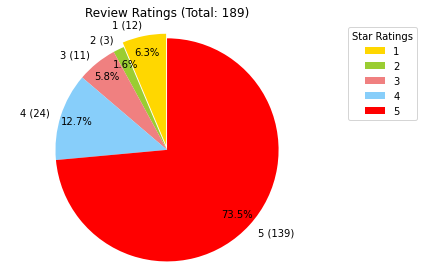

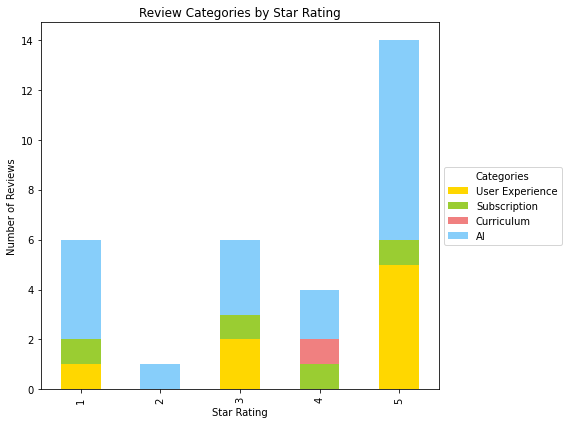

In [12]:
result = result[~result['review_description'].str.contains('zuai', case=False)]

# 1. Donut Pie Chart
total_ratings = len(result)
rating_counts = result['rating'].value_counts().sort_index()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
explode = (0.05, 0, 0, 0, 0)  # explode the 1-star slice

# Create the donut plot
fig, ax = plt.subplots()
ax.pie(rating_counts, radius=1.2, colors=colors, labels=[f"{star_rating} ({count})" for star_rating, count in rating_counts.items()], autopct='%1.1f%%',
       startangle=90, pctdistance=0.85, explode=explode)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title(f'Review Ratings (Total: {total_ratings})')
plt.legend(rating_counts.index, title='Star Ratings', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# 2. Stacked Bar Chart
user_experience_keywords = ['crash', 'crashed', 'UI', 'UX']
subscription_keywords = ['premium', 'costly']
curriculum_keywords = ['lacking', 'my subject', 'maths']
ai_keywords = ['AI', 'bot', 'slow']

user_experience_reviews = result['review_description'].str.contains('|'.join(user_experience_keywords), case=False)
subscription_reviews = result['review_description'].str.contains('|'.join(subscription_keywords), case=False)
curriculum_reviews = result['review_description'].str.contains('|'.join(curriculum_keywords), case=False)
ai_reviews = result['review_description'].str.contains('|'.join(ai_keywords), case=False)

categories = pd.DataFrame({
    'User Experience': user_experience_reviews.groupby(result['rating']).sum(),
    'Subscription': subscription_reviews.groupby(result['rating']).sum(),
    'Curriculum': curriculum_reviews.groupby(result['rating']).sum(),
    'AI': ai_reviews.groupby(result['rating']).sum()
})

fig, ax = plt.subplots(figsize=(8, 6))
ax = categories.plot(kind='bar', stacked=True, ax=ax, color=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'])
ax.set_xlabel('Star Rating')
ax.set_ylabel('Number of Reviews')
ax.set_title('Review Categories by Star Rating')
ax.legend(title='Categories', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()
